### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

### ---------------

For Monte Carlo integration, we need to have a $p(x)$ in the integral which is normalized to one over ($0, \infty$). We can use the exponential to get a Gaussian $\mathscr{N}(\mu = 0, \sigma)$ :

$$ (\sigma\sqrt{2\pi}) \cdot \int_{0}^\infty (x^3) \cdot \left[\frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right)\right] \,dx \, \, = 2\sigma^4\,\, .$$
And to normalize the Gaussian between ($0, \infty$) we need to take a half-normal distribution, by moltiplying by $2 \cdot \mathscr{N}(\mu = 0, \sigma)$.
The integral can now be approximated to:

$$ (\frac{\sigma\sqrt{2\pi}}{2}) \cdot \int_{0}^\infty (x^3) \cdot \left[\frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right)\right] \,dx \, \, \simeq \sigma\sqrt{\frac{\pi}{2}} \cdot \frac{1}{N} \sum_{i=1} ^N (x_i)^3$$

where $x_i$ are samples drawn from $p(x)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#-- Defining the Gaussian
mu = 0.0
sigma = 2.0
p_x = norm(mu, sigma) 

#-- Expected result
exp_result = 2 * sigma**4
print(exp_result)

32.0


In [3]:
#-- Defining the number of samples for each run
runs = 30
N = np.array(np.logspace(1, 5, runs, dtype = int))
#print(N)

In [4]:
#-- Sampling from the half-normal distribution
samples = []
for n in N:
    samples.append( np.abs(p_x.rvs(size=(n,))) )

#print(samples)

#-- Monte Carlo integration
integral = np.array( [sigma * np.sqrt(np.pi/2) * (1 / N[i]) * np.sum(samples[i] ** 3) for i in range(runs)] )
print(integral)

[36.17567522 31.47081225 32.52736745 57.60641144 22.98146173 40.4981385
 27.69197848 34.26199279 34.09039525 30.16754411 28.19220495 34.5345571
 30.78555915 36.65702705 30.42797482 33.57895977 32.00248926 32.20048135
 32.22453572 33.74812849 31.04878241 32.66397437 31.88156192 31.63622391
 32.72949759 31.54026587 31.42326467 32.31978614 31.87508124 32.05274232]


In [5]:
#-- Computing the error: |integral - analytical_result| / analytical_result
error = np.abs(integral - exp_result) / exp_result

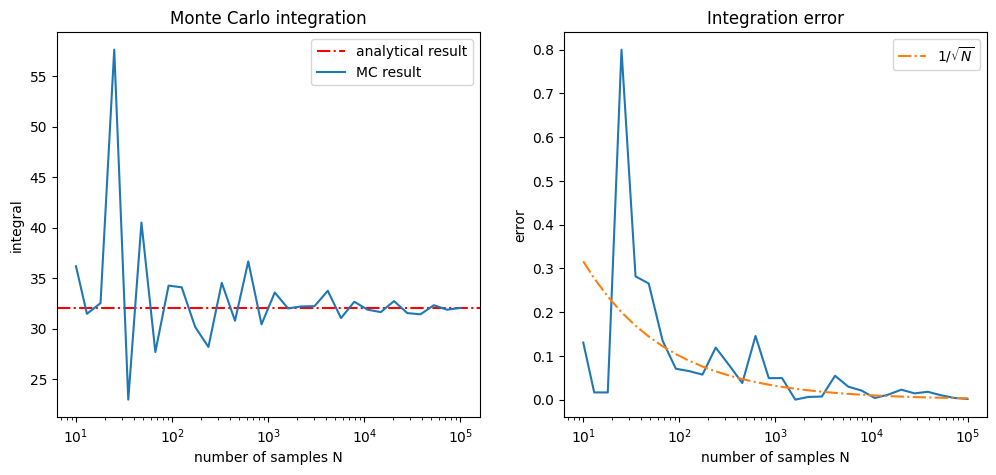

In [6]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 5))

ax[0].axhline(y=exp_result, xmin = 0, xmax = 1, color = 'r', linestyle = '-.', label = 'analytical result')
ax[0].plot(N, integral, label = 'MC result')
ax[0].semilogx()
ax[0].set (xlabel='number of samples N', ylabel = 'integral', title = 'Monte Carlo integration')
ax[0].legend()

ax[1].plot(N, error)
ax[1].plot(N, 1 / np.sqrt(N), color = 'C1', linestyle = '-.', label = r'$1/\sqrt{N}$')
ax[1].semilogx()
ax[1].set (xlabel='number of samples N', ylabel = 'error', title = 'Integration error')
ax[1].legend()

plt.show()

For the central limit theorem the distribution of the integration results is Gaussian, meaning the error will decrease $\propto \frac{1}{\sqrt{N}}$.

In [7]:
#-- Resampling for a fixed N
runs = 100

N_small = 10
N_large = int(1E5)

samples_s = []
samples_l = []

for i in range(runs):
    samples_s.append( np.abs(p_x.rvs(size=N_small)) )
    samples_l.append( np.abs(p_x.rvs(size=N_large)) )

integral_s = np.array( [sigma * np.sqrt(np.pi/2) * (1 / N_small) * np.sum(samples_s[i] ** 3) for i in range(runs)] )
integral_l = np.array( [sigma * np.sqrt(np.pi/2) * (1 / N_large) * np.sum(samples_l[i] ** 3) for i in range(runs)] )

In [8]:
#-- Fitting the distribution by hand, using Gaussians
mean_s, sigma_s = np.mean(integral_s), np.std(integral_s, ddof = 1)
mean_l, sigma_l = np.mean(integral_l),  np.std(integral_l, ddof = 1)

gauss_s = norm(mean_s, sigma_s)
gauss_l = norm(mean_l, sigma_l)

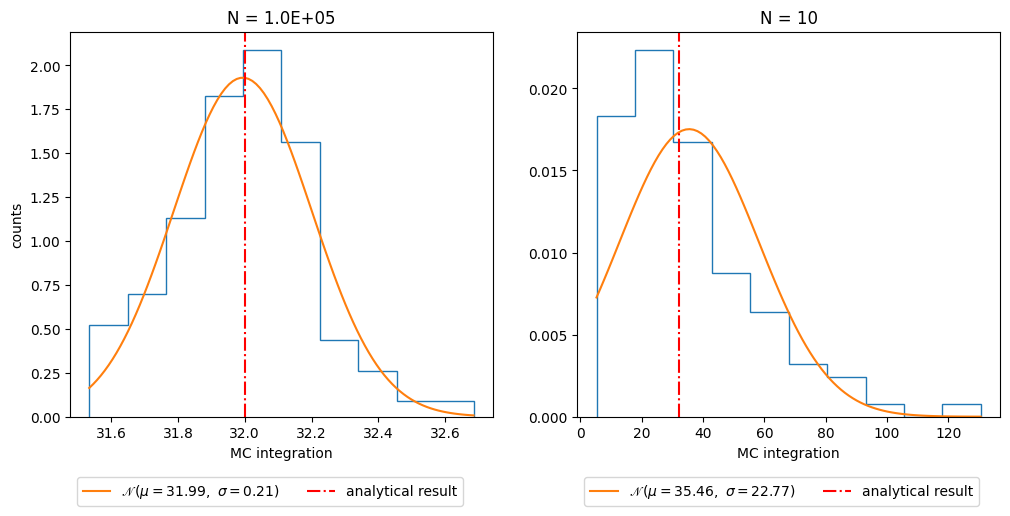

In [9]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 5))

x = np.linspace(min(integral_l), max(integral_l), 100)
ax[0].hist(integral_l, bins = int(np.sqrt(runs)), density = True, histtype = 'step')
ax[0].plot(x, gauss_l.pdf(x), label = r'$\mathscr{N}(\mu=' + f'{mean_l:.2f}' + ',\ \sigma=' + f'{sigma_l:.2f}' + ')$')
ax[0].axvline(exp_result, color = 'r', linestyle = '-.', label = 'analytical result')
ax[0].set(xlabel = 'MC integration', ylabel = 'counts', title = 'N = ' + f'{N_large:.1E}')
ax[0].legend(loc='lower left', bbox_to_anchor=(0, -0.25), ncols = 2)

xx = np.linspace(min(integral_s), max(integral_s), 100)
ax[1].hist(integral_s, bins = int(np.sqrt(runs)), density = True, histtype = 'step')
ax[1].plot(xx, gauss_s.pdf(xx), label =r'$\mathscr{N}(\mu=' + f'{mean_s:.2f}' + ',\ \sigma=' + f'{sigma_s:.2f}' + ')$')
ax[1].axvline(exp_result, color = 'r', linestyle = '-.', label = 'analytical result')
ax[1].set(xlabel = 'MC integration', title = 'N = ' + str(N_small))
ax[1].legend(loc='lower left', bbox_to_anchor=(0, -0.25), ncols = 2)

plt.show()

In [10]:
from tqdm import tqdm

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.98it/s]


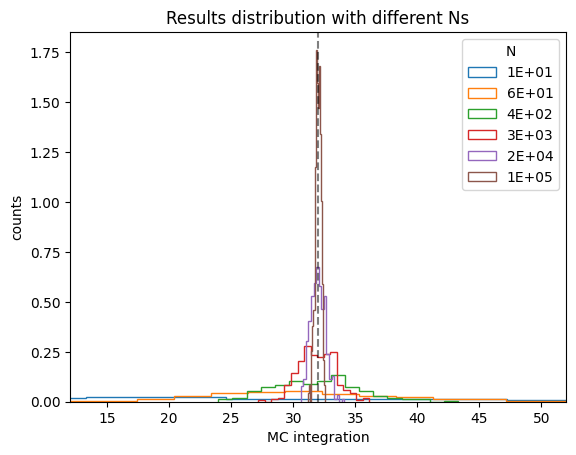

In [14]:
N = np.array(np.logspace(1, 5, 6, dtype = int))
runs = 300
integral = np.empty(5)

for n in tqdm(N):
    integral = []
    for j in range(runs):
        samples = np.abs(p_x.rvs(size=(n,))) 
        integral.append(sigma * np.sqrt(np.pi/2) * (1 / n) * np.sum(samples ** 3))
    plt.hist(integral, bins = int(np.sqrt(runs)), density = True, histtype = 'step', label = f'{n:.0E}')

plt.xlim([12, 52])
plt.xlabel('MC integration')
plt.ylabel('counts')
plt.title('Results distribution with different Ns')
plt.axvline(exp_result, alpha = 0.5, c = 'black', linestyle = '--')
plt.legend(title = 'N')
plt.show()

As N increases, the distribution is more and more peaked on the expected value.